In [1]:
import pandas as pd
from google.cloud import storage
import os
import glob
import json

os.environ["GCLOUD_PROJECT"] = "newprojectnew-435415"



In [2]:
def download_bucket_with_transfer_manager(
    bucket_name, destination_directory="", workers=8, max_results=10000000
):
    """Download all of the blobs in a bucket, concurrently in a process pool.

    The filename of each blob once downloaded is derived from the blob name and
    the `destination_directory `parameter. For complete control of the filename
    of each blob, use transfer_manager.download_many() instead.

    Directories will be created automatically as needed, for instance to
    accommodate blob names that include slashes.
    """

    # The ID of your GCS bucket
    # bucket_name = "your-bucket-name"

    # The directory on your computer to which to download all of the files. This
    # string is prepended (with os.path.join()) to the name of each blob to form
    # the full path. Relative paths and absolute paths are both accepted. An
    # empty string means "the current working directory". Note that this
    # parameter allows accepts directory traversal ("../" etc.) and is not
    # intended for unsanitized end user input.
    # destination_directory = ""

    # The maximum number of processes to use for the operation. The performance
    # impact of this value depends on the use case, but smaller files usually
    # benefit from a higher number of processes. Each additional process occupies
    # some CPU and memory resources until finished. Threads can be used instead
    # of processes by passing `worker_type=transfer_manager.THREAD`.
    # workers=8

    # The maximum number of results to fetch from bucket.list_blobs(). This
    # sample code fetches all of the blobs up to max_results and queues them all
    # for download at once. Though they will still be executed in batches up to
    # the processes limit, queueing them all at once can be taxing on system
    # memory if buckets are very large. Adjust max_results as needed for your
    # system environment, or set it to None if you are sure the bucket is not
    # too large to hold in memory easily.
    # max_results=1000

    from google.cloud.storage import Client, transfer_manager

    storage_client = Client()
    bucket = storage_client.bucket(bucket_name)

    blob_names = [blob.name for blob in bucket.list_blobs(max_results=max_results)]

    results = transfer_manager.download_many_to_path(
        bucket, blob_names, destination_directory=destination_directory, max_workers=workers
    )

    for name, result in zip(blob_names, results):
        # The results list is either `None` or an exception for each blob in
        # the input list, in order.

        if isinstance(result, Exception):
            print("Failed to download {} due to exception: {}".format(name, result))
        else:
            print("Downloaded {} to {}.".format(name, destination_directory + name))

In [3]:
download_bucket_with_transfer_manager("sensor1data", destination_directory="/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/")


/opt/anaconda3/lib/python3.11/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Downloaded 2024-10-17T01:20:11+00:00_34df4c to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:20:11+00:00_34df4c.
Downloaded 2024-10-17T01:21:26+00:00_f1402c to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:21:26+00:00_f1402c.
Downloaded 2024-10-17T01:22:30+00:00_bdb0d8 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:22:30+00:00_bdb0d8.
Downloaded 2024-10-17T01:23:28+00:00_2c5a85 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:23:28+00:00_2c5a85.
Downloaded 2024-10-17T01:24:26+00:00_ba5f55 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:24:26+00:00_ba5f55.
Downloaded 2024-10-17T01:25:26+00:00_f27930 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:25:26+00:00_f27930.
Downloaded 2024-10-17T01:26:26+00:00_213278 to /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/file

In [4]:
path = '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/' 
all_files = glob.glob(path + "2024*") 
all_files


['/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:44:30+00:00_2e20cc',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T15:17:23+00:00_c0e4e9',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T04:32:30+00:00_91af48',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T04:30:54+00:00_593fb1',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T07:26:31+00:00_b03127',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T05:53:32+00:00_461c6f',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T04:48:54+00:00_5016ee',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T09:28:55+00:00_fb2057',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:55:27+00:00_58c9bc',
 '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/f

In [5]:
# Specify the directory containing the files
directory = '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/'



# Iterate over all files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)

    # Ensure it's a file
    if os.path.isfile(file_path):
        try:
            # Read the content of the file
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read().strip()

            # Handle empty files
            if content == '':
                print(f"File {file_path} is empty.")
                continue

            # Try to load the content as JSON
            try:
                json_data = json.loads(content)
            except json.JSONDecodeError:
                print(f"Invalid JSON in file {file_path}. Attempting to prepend bracket anyway.")
                # You might want to handle it differently or just prepend '{'
                json_data = None

            # Prepend '{' to the content
            new_content = '{' + content

            # Write the new content back to the file
            with open(file_path, 'w', encoding='utf-8') as file:
                file.write(new_content)

            print(f"Updated {file_path}.")

        except Exception as e:
            print(f"Error processing {file_path}: {e}")

print("Done processing files.")


Invalid JSON in file /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:44:30+00:00_2e20cc. Attempting to prepend bracket anyway.
Updated /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:44:30+00:00_2e20cc.
Invalid JSON in file /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T15:17:23+00:00_c0e4e9. Attempting to prepend bracket anyway.
Updated /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T15:17:23+00:00_c0e4e9.
Invalid JSON in file /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T04:32:30+00:00_91af48. Attempting to prepend bracket anyway.
Updated /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T04:32:30+00:00_91af48.
Invalid JSON in file /Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T04:30:54+00:00_593fb1. Attempting to prepend bracket anyway.
Updated /Users/danielmw/Documents

In [6]:
def read_large_files(directory, min_size_bytes):
    """Reads  files from a directory that are greater than a specified size."""

    dfs = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath) and os.path.getsize(filepath) > min_size_bytes:
            try:
                print(filepath)
                with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
                    df = pd.read_json(file,lines=True)

            #df = pd.read_json(filepath, lines=True,encoding_errors='ignore')
                    dfs.append(df)
            except ValueError as e:
                print(f"Error reading {filename}: {e}")


    if dfs:
        return pd.concat(dfs, ignore_index=True)
    else:
        return None

In [7]:
directory_path = '/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/'
min_file_size = 100  # bytes
fulldata = read_large_files(directory_path,min_file_size)

/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:44:30+00:00_2e20cc
/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T15:17:23+00:00_c0e4e9
/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T04:32:30+00:00_91af48
/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T04:30:54+00:00_593fb1
/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T07:26:31+00:00_b03127
/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T05:53:32+00:00_461c6f
/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T04:48:54+00:00_5016ee
/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-19T09:28:55+00:00_fb2057
/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:55:27+00:00_58c9bc
/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T05:57:36+00:00_231138


In [8]:
fulldata2 = pd.read_json('/Users/danielmw/Documents/Columbia/sensor_comp/trevor_sensor/files/2024-10-17T01:26:26+00:00_213278',typ='series')
fulldata

,TS,MV,VV,VP,CWV,CBV,S1WV,S1BV,S2WV,S2BV,P25,TMP,HUM
0,2024-10-16T21:44:28,0.052031,0.126500,0.210833,0.176500,0.090937,0.063094,0.131313,0.070969,0.173344,0.0,21.2,28.1
1,2024-10-17T11:17:47,0.042781,0.199656,0.332760,0.274688,0.132281,0.129531,0.199594,0.046063,0.343969,0.0,22.6,32.5
2,2024-10-17T00:32:45,0.050406,0.200313,0.333854,0.340750,0.132312,0.128469,0.190406,0.048750,0.263687,1.5,23.0,30.7
3,2024-10-19T00:29:41,0.080688,0.222562,0.370937,0.236719,0.162094,0.133094,0.227219,0.084469,0.236937,0.3,23.1,34.1
4,2024-10-17T03:27:02,0.046281,0.192719,0.321198,0.206031,0.140094,0.134844,0.194844,0.043375,0.202500,0.0,22.6,31.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,2024-10-19T01:54:50,0.094000,0.238094,0.396823,0.246938,0.212375,0.211188,0.243688,0.102688,0.251750,0.0,23.3,34.2
1528,2024-10-18T21:41:25,0.092687,0.251500,0.419167,0.260375,0.196875,0.196344,0.251125,0.092656,0.264344,0.0,15.1,44.3
1529,2024-10-17T02:34:57,0.051188,0.197188,0.328646,0.280125,0.127344,0.126438,0.190844,0.044406,0.265656,0.0,22.8,31.7
1530,2024-10-18T23:45:37,0.079594,0.224125,0.373542,0.234063,0.189969,0.184937,0.219125,0.074938,0.224344,1.0,22.1,36.2


In [9]:
fulldata.columns

Index(['TS', 'MV', 'VV', 'VP', 'CWV', 'CBV', 'S1WV', 'S1BV', 'S2WV', 'S2BV',
       'P25', 'TMP', 'HUM'],
      dtype='object')

In [10]:
fulldata['datetime']=pd.to_datetime(fulldata.TS,errors='coerce')

In [11]:
fulldata = fulldata.set_index('datetime')


In [12]:
fulldata

,TS,MV,VV,VP,CWV,CBV,S1WV,S1BV,S2WV,S2BV,P25,TMP,HUM
datetime,,,,,,,,,,,,,
2024-10-16 21:44:28,2024-10-16T21:44:28,0.052031,0.126500,0.210833,0.176500,0.090937,0.063094,0.131313,0.070969,0.173344,0.0,21.2,28.1
2024-10-17 11:17:47,2024-10-17T11:17:47,0.042781,0.199656,0.332760,0.274688,0.132281,0.129531,0.199594,0.046063,0.343969,0.0,22.6,32.5
2024-10-17 00:32:45,2024-10-17T00:32:45,0.050406,0.200313,0.333854,0.340750,0.132312,0.128469,0.190406,0.048750,0.263687,1.5,23.0,30.7
2024-10-19 00:29:41,2024-10-19T00:29:41,0.080688,0.222562,0.370937,0.236719,0.162094,0.133094,0.227219,0.084469,0.236937,0.3,23.1,34.1
2024-10-17 03:27:02,2024-10-17T03:27:02,0.046281,0.192719,0.321198,0.206031,0.140094,0.134844,0.194844,0.043375,0.202500,0.0,22.6,31.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-19 01:54:50,2024-10-19T01:54:50,0.094000,0.238094,0.396823,0.246938,0.212375,0.211188,0.243688,0.102688,0.251750,0.0,23.3,34.2
2024-10-18 21:41:25,2024-10-18T21:41:25,0.092687,0.251500,0.419167,0.260375,0.196875,0.196344,0.251125,0.092656,0.264344,0.0,15.1,44.3
2024-10-17 02:34:57,2024-10-17T02:34:57,0.051188,0.197188,0.328646,0.280125,0.127344,0.126438,0.190844,0.044406,0.265656,0.0,22.8,31.7


In [13]:

#fulldata_sub = fulldata.sort_index().loc['2024-09-14' : '2024-09-24', :] 

#fulldata_sub = fulldata.sort_index()#.loc['2024-09-24 14:39:48':'2024-09-14 13:25:29']

#fulldata_sub = fulldata_sub.reset_index()
#fulldata_sub = fulldata_sub.dropna(subset=['datetime'])
#fulldata_final = fulldata_sub.drop(fulldata_sub.index[-63000:])
#fulldata_final
fulldata_final = fulldata
fulldata_final


,TS,MV,VV,VP,CWV,CBV,S1WV,S1BV,S2WV,S2BV,P25,TMP,HUM
datetime,,,,,,,,,,,,,
2024-10-16 21:44:28,2024-10-16T21:44:28,0.052031,0.126500,0.210833,0.176500,0.090937,0.063094,0.131313,0.070969,0.173344,0.0,21.2,28.1
2024-10-17 11:17:47,2024-10-17T11:17:47,0.042781,0.199656,0.332760,0.274688,0.132281,0.129531,0.199594,0.046063,0.343969,0.0,22.6,32.5
2024-10-17 00:32:45,2024-10-17T00:32:45,0.050406,0.200313,0.333854,0.340750,0.132312,0.128469,0.190406,0.048750,0.263687,1.5,23.0,30.7
2024-10-19 00:29:41,2024-10-19T00:29:41,0.080688,0.222562,0.370937,0.236719,0.162094,0.133094,0.227219,0.084469,0.236937,0.3,23.1,34.1
2024-10-17 03:27:02,2024-10-17T03:27:02,0.046281,0.192719,0.321198,0.206031,0.140094,0.134844,0.194844,0.043375,0.202500,0.0,22.6,31.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-19 01:54:50,2024-10-19T01:54:50,0.094000,0.238094,0.396823,0.246938,0.212375,0.211188,0.243688,0.102688,0.251750,0.0,23.3,34.2
2024-10-18 21:41:25,2024-10-18T21:41:25,0.092687,0.251500,0.419167,0.260375,0.196875,0.196344,0.251125,0.092656,0.264344,0.0,15.1,44.3
2024-10-17 02:34:57,2024-10-17T02:34:57,0.051188,0.197188,0.328646,0.280125,0.127344,0.126438,0.190844,0.044406,0.265656,0.0,22.8,31.7


In [14]:
#fulldata_final = fulldata_final.set_index('datetime')

hourly_avg_df = fulldata_final.resample('5min').mean(numeric_only=True)
hourly_avg_df


,MV,VV,VP,CWV,CBV,S1WV,S1BV,S2WV,S2BV,P25,TMP,HUM
datetime,,,,,,,,,,,,
2024-10-16 21:20:00,0.047819,0.112182,0.186969,0.247819,0.075794,0.072231,0.111788,0.042062,0.264038,0.00,23.54,25.36
2024-10-16 21:25:00,0.080531,0.126663,0.211104,0.241725,0.088062,0.080719,0.127281,0.079394,0.237394,9.02,22.04,27.00
2024-10-16 21:30:00,0.080425,0.128019,0.213364,0.252881,0.079481,0.078475,0.126844,0.076450,0.244500,10.38,21.84,27.32
2024-10-16 21:35:00,0.074819,0.130019,0.216698,0.224663,0.076194,0.081975,0.128544,0.074294,0.269219,0.86,21.34,28.00
2024-10-16 21:40:00,0.066487,0.129044,0.215073,0.206119,0.078338,0.073532,0.129963,0.070863,0.239119,0.44,21.14,28.24
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-19 09:00:00,0.061325,0.202719,0.337865,0.213837,0.057506,0.056656,0.203000,0.060669,0.210956,0.00,22.30,36.16
2024-10-19 09:05:00,0.060306,0.200706,0.334511,0.210932,0.071256,0.071150,0.202094,0.061669,0.213281,0.00,22.40,36.00
2024-10-19 09:10:00,0.061606,0.203319,0.338865,0.212375,0.072469,0.071188,0.201313,0.060100,0.211444,0.00,22.30,36.02


(0.0, 10.0)

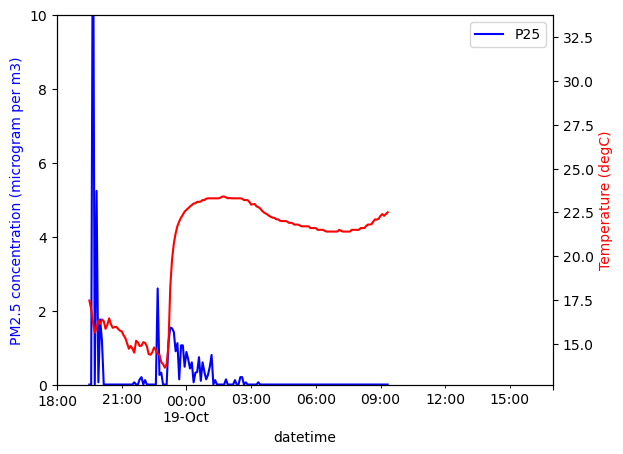

In [20]:
ax = hourly_avg_df.plot(y=['P25'],color='blue')
hourly_avg_df.plot(y=['TMP'],ax=ax,secondary_y=True,color='red')
ax.set_ylabel('PM2.5 concentration (microgram per m3)',color='blue')
ax.right_ax.set_ylabel('Temperature (degC)',color='red')
ax.legend(loc='upper right')
ax.set_xlim(['10-18-2024 18:00:00','10-19-2024 17:00:00'])
ax.set_ylim([0,10])


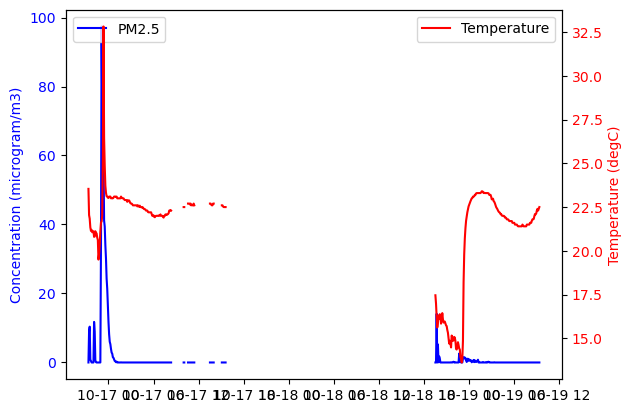

In [16]:
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots()

# Plot the first y-values
ax1.plot(hourly_avg_df.index, hourly_avg_df['P25'], color='blue', label='PM2.5')
ax1.set_ylabel('Concentration (microgram/m3)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second y-values
ax2.plot(hourly_avg_df.index, hourly_avg_df['TMP'], color='red', label='Temperature')
ax2.set_ylabel('Temperature (degC)', color='red')
ax2.tick_params(axis='y', labelcolor='red')


# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


In [17]:
#test